In [1]:
import tensorflow_core as tf
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
def split_dataset(x_dataset, y_dataset, ratio):
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[0:num_train]
    x_test = x_dataset[num_train:x_dataset.size]
    y_train = y_dataset[0:num_train]
    y_test = y_dataset[num_train:x_dataset.size]
    return x_train, x_test, y_train, y_test

In [3]:
x_dataset = np.linspace(-1, 1, 300)
y_dataset = 2 * x_dataset + np.random.randn(*x_dataset.shape) * 0.35

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

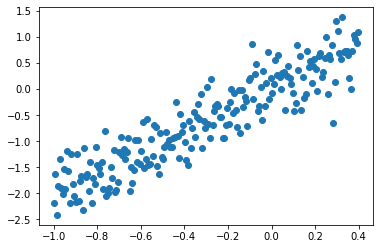

In [4]:
plt.scatter(x_train, y_train)

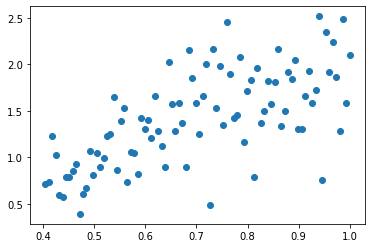

In [5]:
plt.scatter(x_test, y_test)

In [6]:
def model(X, w):
    return tf.multiply(X, w)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w = tf.Variable(0.0, name="weights")
y_model = model(X, w)

cost = tf.sqrt(tf.square(Y - y_model))

learning_rate = 0.01
training_epochs = 100

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
sess.close()

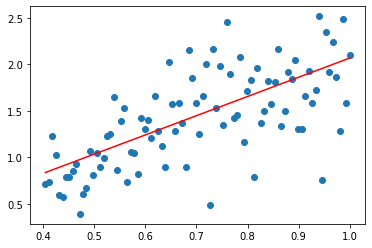

In [8]:
plt.scatter(x_test, y_test)
y_learned = x_test * w_val

plt.plot(x_test, y_learned, "r")
plt.show()